In [1]:
from src.utils import download, create_rating_matrix
from src.models import NMF, GA
import time
import zipfile
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.decomposition import NMF as NMF_sklearn
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from scipy.special import softmax
from numba import jitclass, int32, float64, typeof    # import the types

# Download and Process Data

In [2]:
# download data
download(save_path=r"./data/ml-100k.zip", chunk_size=128)
with zipfile.ZipFile(r"./data/ml-100k.zip") as zip_ref:
    zip_ref.extractall(r"./data/")

# Use Cross-Validation to Train NMF model

In [ ]:
X = create_rating_matrix(f"./data/ml-100k/u.data")

In [9]:
n_components = [x for x in range(50, 1050, 50)]
#n_components = [50, 100]
results_train = np.zeros((len(n_components), 5))
results_test = np.zeros((len(n_components), 5))
for i, k in enumerate(n_components):
    times = []
    for j in range(1,6):    
        start_time = time.time()
        X_train = create_rating_matrix(f"./data/ml-100k/u{j}.base")
        X_test = create_rating_matrix(f"./data/ml-100k/u{j}.test")
        nmf = NMF_sklearn(n_components=k, max_iter=10000).fit(X_train)
        W_train = nmf.transform(X_train)
        W_test = nmf.transform(X_test)
        H = nmf.components_
        err_train = np.linalg.norm(X_train - W_train @ H)
        err_test = np.linalg.norm(X_test - W_test @ H)
        results_train[i, j-1] = err_train
        results_test[i, j-1] = err_test
        end_time = time.time()
        times.append(end_time - start_time)
    print(f"n_components: {k}, Mean Training Error: {results_train[i].mean()}, Mean Test Error: {results_test[i].mean()}, 'Mean Run Time: {np.mean(np.array(times))}'")

n_components: 50, Mean Training Error: 746.9581481449425, Mean Test Error: 463.1039119222799, 'Mean Run Time: 10.68386631011963'
n_components: 100, Mean Training Error: 679.0507209438032, Mean Test Error: 448.44636990096535, 'Mean Run Time: 21.12169542312622'
n_components: 150, Mean Training Error: 619.3154866207061, Mean Test Error: 437.58751572760957, 'Mean Run Time: 60.72271132469177'
n_components: 200, Mean Training Error: 564.1422269302741, Mean Test Error: 426.6395055979474, 'Mean Run Time: 98.48183608055115'
n_components: 250, Mean Training Error: 512.6012983135698, Mean Test Error: 415.81838203523995, 'Mean Run Time: 77.36201205253602'
n_components: 300, Mean Training Error: 464.5790262918516, Mean Test Error: 405.61533778544594, 'Mean Run Time: 92.13537693023682'
n_components: 350, Mean Training Error: 420.45266574319146, Mean Test Error: 398.61129345501325, 'Mean Run Time: 128.9423421382904'
n_components: 400, Mean Training Error: 377.78095025143415, Mean Test Error: 386.7925

In [13]:
with open('cv_train_res.csv', 'w') as f:
    for i, k in enumerate(n_components):
        f.write(f"{n_components[i]}, {results_train[i, 0]}, {results_train[i, 1]}, {results_train[i, 2]}, {results_train[i, 3]}, {results_train[i, 4]}\n")

with open('cv_test_res.csv', 'w') as f:
    for i, k in enumerate(n_components):
        f.write(f"{n_components[i]}, {results_test[i, 0]}, {results_test[i, 1]}, {results_test[i, 2]}, {results_test[i, 3]}, {results_test[i, 4]}\n")

In [12]:
n_components2 = [1100, 1200, 1300, 1400, 1500]
#n_components = [50, 100]
results_train2 = np.zeros((len(n_components2), 5))
results_test2 = np.zeros((len(n_components2), 5))
for i, k in enumerate(n_components2):
    times = []
    for j in range(1,6):    
        start_time = time.time()
        X_train = create_rating_matrix(f"./data/ml-100k/u{j}.base")
        X_test = create_rating_matrix(f"./data/ml-100k/u{j}.test")
        nmf = NMF_sklearn(n_components=k, max_iter=10000).fit(X_train)
        W_train = nmf.transform(X_train)
        W_test = nmf.transform(X_test)
        H = nmf.components_
        err_train = np.linalg.norm(X_train - W_train @ H)
        err_test = np.linalg.norm(X_test - W_test @ H)
        results_train2[i, j-1] = err_train
        results_test2[i, j-1] = err_test
        end_time = time.time()
        times.append(end_time - start_time)
    print(f"n_components: {k}, Mean Training Error: {results_train2[i].mean()}, Mean Test Error: {results_test2[i].mean()}, 'Mean Run Time: {np.mean(np.array(times))}'")

n_components: 1100, Mean Training Error: 39.225403243170426, Mean Test Error: 344.27865709863056, 'Mean Run Time: 560.5994490623474'
n_components: 1200, Mean Training Error: 29.090764117126035, Mean Test Error: 337.37494241367597, 'Mean Run Time: 618.9436069488526'
n_components: 1300, Mean Training Error: 24.064263363573776, Mean Test Error: 332.3396039026092, 'Mean Run Time: 542.0525531768799'
n_components: 1400, Mean Training Error: 17.937580675416644, Mean Test Error: 332.4934188504252, 'Mean Run Time: 774.0931154251099'
n_components: 1500, Mean Training Error: 15.8651829272053, Mean Test Error: 324.1796929178371, 'Mean Run Time: 636.5428411960602'


In [14]:
with open('cv_train_res.csv', 'a+') as f:
    for i, k in enumerate(n_components2):
        f.write(f"{n_components2[i]}, {results_train2[i, 0]}, {results_train2[i, 1]}, {results_train2[i, 2]}, {results_train2[i, 3]}, {results_train2[i, 4]}\n")

with open('cv_test_res.csv', 'a+') as f:
    for i, k in enumerate(n_components2):
        f.write(f"{n_components2[i]}, {results_test2[i, 0]}, {results_test2[i, 1]}, {results_test2[i, 2]}, {results_test2[i, 3]}, {results_test2[i, 4]}\n")

In [3]:
n_components3 = [1600]
#n_components = [50, 100]
results_train3 = np.zeros((len(n_components3), 5))
results_test3 = np.zeros((len(n_components3), 5))
for i, k in enumerate(n_components3):
    times = []
    for j in range(1,6):    
        start_time = time.time()
        X_train = create_rating_matrix(f"./data/ml-100k/u{j}.base")
        X_test = create_rating_matrix(f"./data/ml-100k/u{j}.test")
        nmf = NMF_sklearn(n_components=k, max_iter=10000).fit(X_train)
        W_train = nmf.transform(X_train)
        W_test = nmf.transform(X_test)
        H = nmf.components_
        err_train = np.linalg.norm(X_train - W_train @ H)
        err_test = np.linalg.norm(X_test - W_test @ H)
        results_train3[i, j-1] = err_train
        results_test3[i, j-1] = err_test
        end_time = time.time()
        times.append(end_time - start_time)
    print(f"n_components: {k}, Mean Training Error: {results_train3[i].mean()}, Mean Test Error: {results_test3[i].mean()}, 'Mean Run Time: {np.mean(np.array(times))}'")

n_components: 1600, Mean Training Error: 12.868746728131999, Mean Test Error: 322.24479610798, 'Mean Run Time: 626.8512004852295'


In [4]:
with open('cv_train_res.csv', 'a+') as f:
    for i, k in enumerate(n_components3):
        f.write(f"{n_components3[i]}, {results_train3[i, 0]}, {results_train3[i, 1]}, {results_train3[i, 2]}, {results_train3[i, 3]}, {results_train3[i, 4]}\n")

with open('cv_test_res.csv', 'a+') as f:
    for i, k in enumerate(n_components3):
        f.write(f"{n_components3[i]}, {results_test3[i, 0]}, {results_test3[i, 1]}, {results_test3[i, 2]}, {results_test3[i, 3]}, {results_test3[i, 4]}\n")

In [2]:
train_cs_res = np.loadtxt('cv_train_res.csv', delimiter=',')
test_cs_res = np.loadtxt('cv_test_res.csv', delimiter=',')

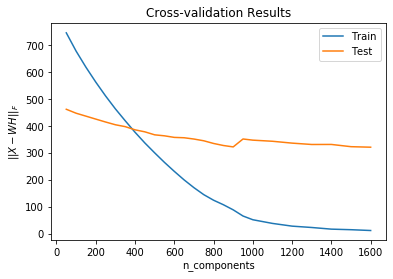

In [5]:
plt.plot(train_cs_res[:, 0], train_cs_res[:, 1:].mean(axis=1), label='Train')
plt.plot(test_cs_res[:, 0], test_cs_res[:, 1:].mean(axis=1), label='Test')
plt.legend()
plt.xlabel('n_components')
plt.ylabel('$||X - WH||_{F}$')
plt.title('Cross-validation Results')
plt.show()

# Genetic Algorithm

In [167]:
# Train Model
start_time = time.time()

GA(cross_over=True,
   w=np.array([0.5, 0.5]),
   pool_size=10,
   mutation_rate=0.75,
   max_iter=100000,
   log_file_name='log_round7.csv',
   population_file_name='pop_round7.csv',
   verbose=True).fit(X, targeted_items=targeted_items)

end_time = time.time()
print('Run Time: ', end_time - start_time)

n_iter: 10000
n_iter: 20000
n_iter: 30000
n_iter: 40000
n_iter: 50000
n_iter: 60000
n_iter: 70000
n_iter: 80000
n_iter: 90000
n_iter: 100000
Run Time:  47911.09400510788


- round 1: mutation rate = 0.1. Ratings chosen from uniform distribution
- round 2: Ratings weighted. Try to make vectors more sparse. Use L1 distance instead of euclidean. Increasing mutation rate to 0.5
- round 3: Changed initial sampling to make ratings more dense at lower item numbers
- round 4: Child mutations also sample from item's rating distribution
- round 5: Disabled cross-over
- round 6: Turn on cross-over. Mutation rate = 0.25
- round 7: Mutation rate = 0.75

### Round 1 Results

In [24]:
P = np.loadtxt('pop_mr10.csv', delimiter=',')

<function matplotlib.pyplot.show(*args, **kw)>

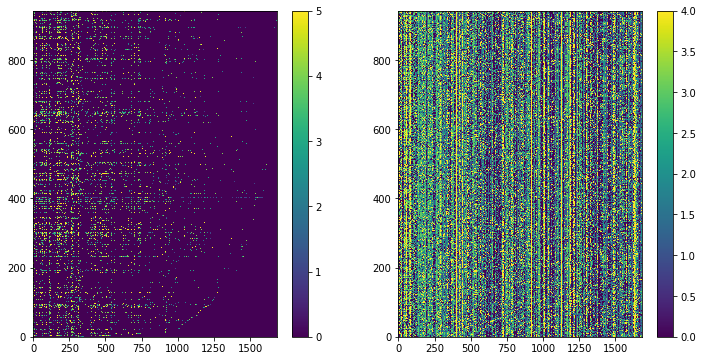

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
im = ax[1].pcolormesh(P)
fig.colorbar(im, ax=ax[1])

im2 = ax[0].pcolormesh(X)
fig.colorbar(im2, ax=ax[0])

plt.show

In [29]:
fitness_df = pd.read_csv('log_mr10.csv', header=None)

C:\Users\popul\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


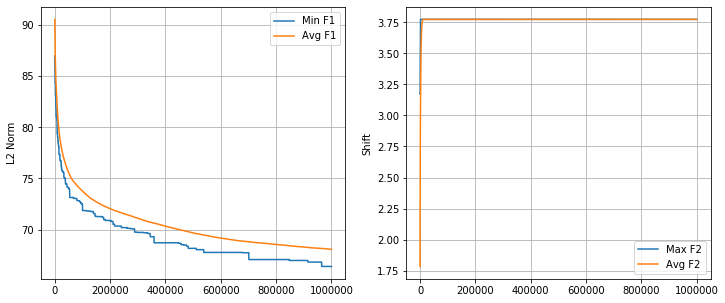

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(fitness_df[1], label='Min F1')
ax[0].plot(fitness_df[2], label='Avg F1')
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel('L2 Norm')

ax[1].plot(fitness_df[3], label='Max F2')
ax[1].plot(fitness_df[4], label='Avg F2')
ax[1].legend()
ax[1].grid()
ax[1].set_ylabel('Shift')

plt.show()

### Round 2 Results

In [88]:
P = np.loadtxt('pop_round2.csv', delimiter=',')

<function matplotlib.pyplot.show(*args, **kw)>

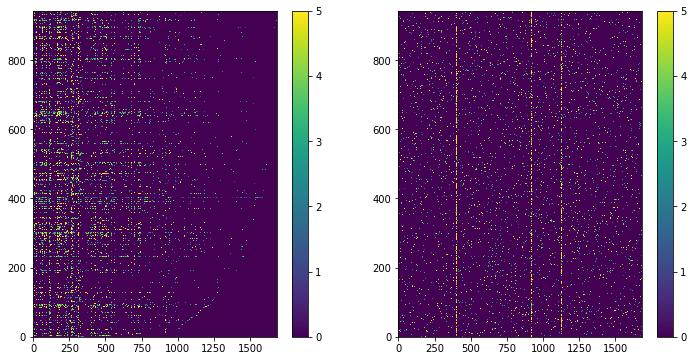

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
im = ax[1].pcolormesh(P)
fig.colorbar(im, ax=ax[1])

im2 = ax[0].pcolormesh(X)
fig.colorbar(im2, ax=ax[0])

plt.show

C:\Users\popul\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


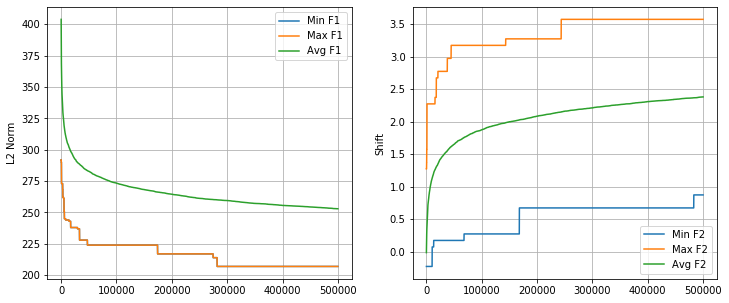

In [92]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(fitness_df[1], label='Min F1')
ax[0].plot(fitness_df[2], label='Max F1')
ax[0].plot(fitness_df[3], label='Avg F1')
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel('L2 Norm')

ax[1].plot(fitness_df[4], label='Min F2')
ax[1].plot(fitness_df[5], label='Max F2')
ax[1].plot(fitness_df[6], label='Avg F2')
ax[1].legend()
ax[1].grid()
ax[1].set_ylabel('Shift')

plt.show()

### Round 3 Results

In [136]:
P = np.loadtxt('pop_round3.csv', delimiter=',')

<function matplotlib.pyplot.show(*args, **kw)>

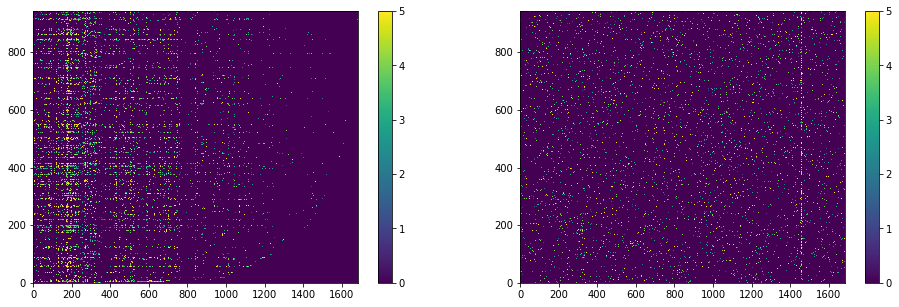

In [138]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
im = ax[1].pcolormesh(P)
fig.colorbar(im, ax=ax[1])

im2 = ax[0].pcolormesh(X)
fig.colorbar(im2, ax=ax[0])

plt.show

In [139]:
fitness_df = pd.read_csv('log_round3.csv', header=None)

C:\Users\popul\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


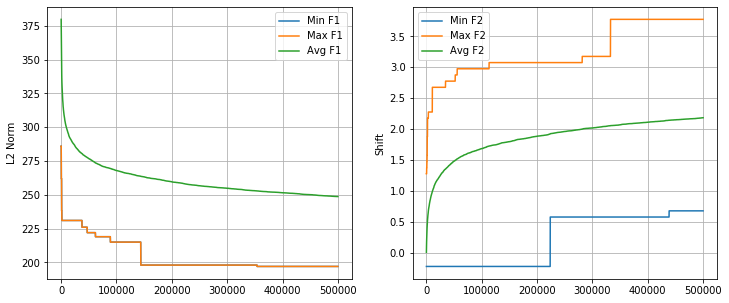

In [140]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(fitness_df[1], label='Min F1')
ax[0].plot(fitness_df[2], label='Max F1')
ax[0].plot(fitness_df[3], label='Avg F1')
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel('L2 Norm')

ax[1].plot(fitness_df[4], label='Min F2')
ax[1].plot(fitness_df[5], label='Max F2')
ax[1].plot(fitness_df[6], label='Avg F2')
ax[1].legend()
ax[1].grid()
ax[1].set_ylabel('Shift')

plt.show()

### round 4

In [154]:
P = np.loadtxt('pop_round4.csv', delimiter=',')

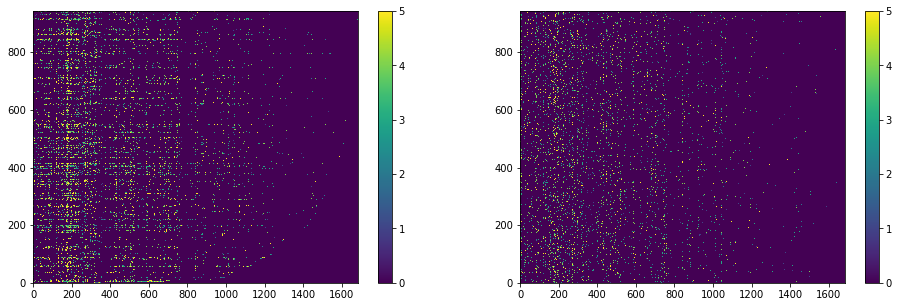

In [156]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
im = ax[1].pcolormesh(P)
fig.colorbar(im, ax=ax[1])

im2 = ax[0].pcolormesh(X)
fig.colorbar(im2, ax=ax[0])

plt.show()

In [157]:
fitness_df = pd.read_csv('log_round4.csv', header=None)

C:\Users\popul\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


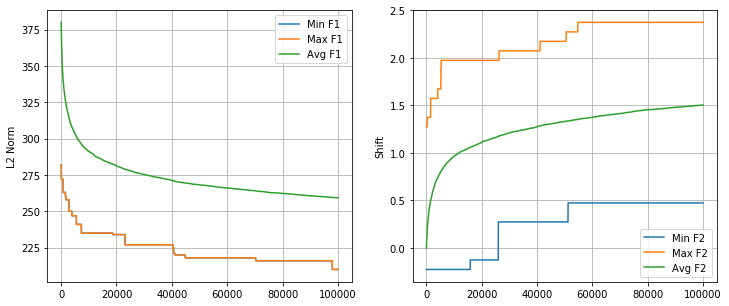

In [158]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(fitness_df[1], label='Min F1')
ax[0].plot(fitness_df[2], label='Max F1')
ax[0].plot(fitness_df[3], label='Avg F1')
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel('L2 Norm')

ax[1].plot(fitness_df[4], label='Min F2')
ax[1].plot(fitness_df[5], label='Max F2')
ax[1].plot(fitness_df[6], label='Avg F2')
ax[1].legend()
ax[1].grid()
ax[1].set_ylabel('Shift')

plt.show()

### Round 5

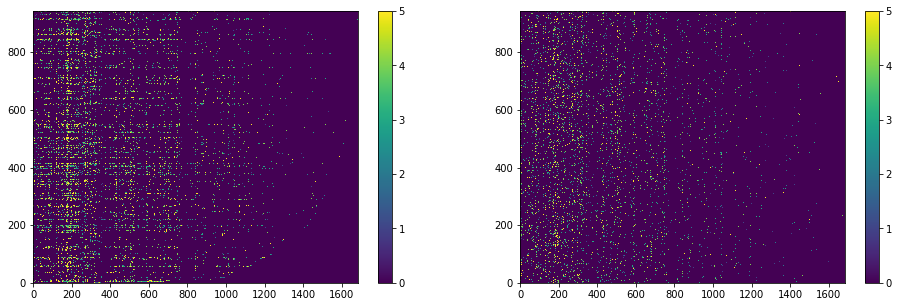

In [161]:
P = np.loadtxt('pop_round5.csv', delimiter=',')
fig, ax = plt.subplots(1,2,figsize=(16,5))
im = ax[1].pcolormesh(P)
fig.colorbar(im,ax=ax[1])

im2 = ax[0].pcolormesh(X)
fig.colorbar(im2, ax=ax[0])
plt.show()

C:\Users\popul\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


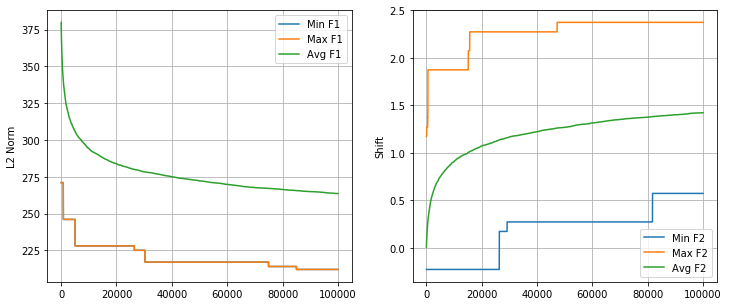

In [163]:
fitness_df = pd.read_csv('log_round5.csv', header=None)
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(fitness_df[1], label='Min F1')
ax[0].plot(fitness_df[2], label='Max F1')
ax[0].plot(fitness_df[3], label='Avg F1')
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel('L2 Norm')

ax[1].plot(fitness_df[4], label='Min F2')
ax[1].plot(fitness_df[5], label='Max F2')
ax[1].plot(fitness_df[6], label='Avg F2')
ax[1].legend()
ax[1].grid()
ax[1].set_ylabel('Shift')
plt.show()

### Round 6

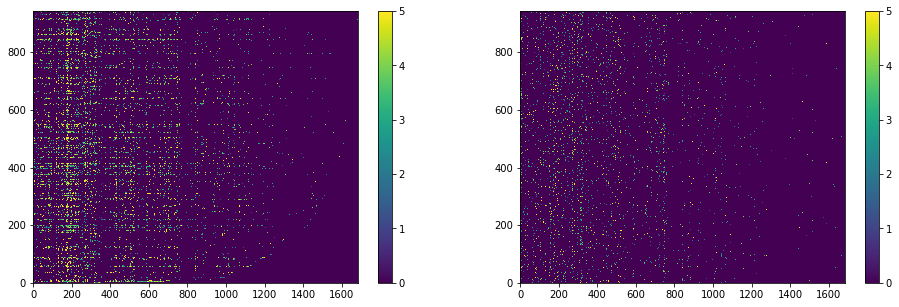

In [165]:
P = np.loadtxt('pop_round6.csv', delimiter=',')
fig, ax = plt.subplots(1,2,figsize=(16,5))
im = ax[1].pcolormesh(P)
fig.colorbar(im, ax=ax[1])

im2 = ax[0].pcolormesh(X)
fig.colorbar(im2, ax=ax[0])
plt.show()

C:\Users\popul\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


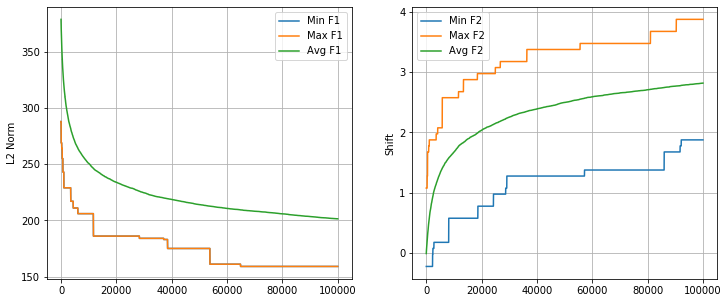

In [166]:
fitness_df = pd.read_csv('log_round6.csv', header=None)
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(fitness_df[1], label='Min F1')
ax[0].plot(fitness_df[2], label='Max F1')
ax[0].plot(fitness_df[3], label='Avg F1')
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel('L2 Norm')

ax[1].plot(fitness_df[4], label='Min F2')
ax[1].plot(fitness_df[5], label='Max F2')
ax[1].plot(fitness_df[6], label='Avg F2')
ax[1].legend()
ax[1].grid()
ax[1].set_ylabel('Shift')
plt.show()

### Round 7

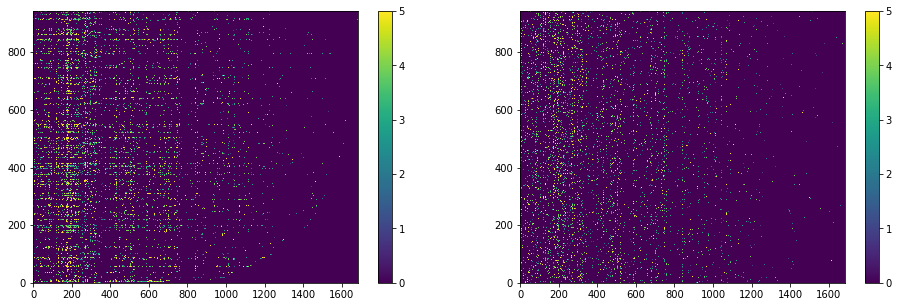

In [168]:
P = np.loadtxt('pop_round7.csv', delimiter=',')
fig, ax = plt.subplots(1,2,figsize=(16,5))
im = ax[1].pcolormesh(P)
fig.colorbar(im, ax=ax[1])

im2 = ax[0].pcolormesh(X)
fig.colorbar(im2, ax=ax[0])
plt.show()

C:\Users\popul\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


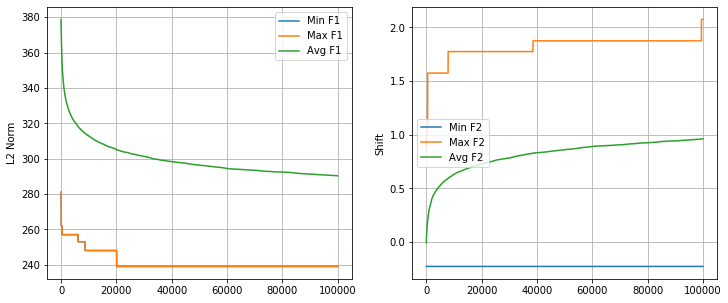

In [169]:
fitness_df = pd.read_csv('log_round7.csv', header=None)
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(fitness_df[1], label='Min F1')
ax[0].plot(fitness_df[2], label='Max F1')
ax[0].plot(fitness_df[3], label='Avg F1')
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel('L2 Norm')

ax[1].plot(fitness_df[4], label='Min F2')
ax[1].plot(fitness_df[5], label='Max F2')
ax[1].plot(fitness_df[6], label='Avg F2')
ax[1].legend()
ax[1].grid()
ax[1].set_ylabel('Shift')
plt.show()

# Evaluation Metrics

### Total Variation Distance and Jensen-Shannon Divergence

$$TVD = \sum_{v \in V} |\textbf{p}(v) - \textbf{q}(v)|/|V|$$

$$ JS = \frac{1}{|V|}\sum_{v \in V} (KL(\textbf{p}(v)||\textbf{m}(v)) + KL(\textbf{q}(v)||\textbf{m}(v)))$$

In [308]:


def kl_div(p, q):
    
    if p.shape != q.shape:
        #print(p.shape, q.shape)
        raise TypeError('p and q must have same shape')
    
    s = 0
    for i in range(len(p)):
        #if q[i] != 0.0 and p[i] != 0:
        if p[i] == 0:
            s += 0
        else:
            s += p[i]*np.log(p[i]/q[i])
            #print(p[i]*np.log(p[i]/q[i]), s)
        
    return s

targeted_items = np.array([ 405,  794, 1457, 1130,  814,   14, 1167,  923, 1033, 1460])

for r in range(2,8):
    # find item distributions for X items and Fake items
    Fake = np.loadtxt(f'pop_round{r}.csv', delimiter=',')
    n_users, n_items = X.shape
    p = np.zeros((n_items, 6))
    for j in range(n_items):
        cnts = np.unique(X[:, j], return_counts=True)
        p[j, cnts[0].astype(int)] = cnts[1]
    p = (p/n_users).T

    q = np.zeros((n_items, 6))
    for j in range(n_items):
        cnts = np.unique(Fake[:, j], return_counts=True)
        q[j, cnts[0].astype(int)] = cnts[1]
    q = (q/n_users).T

    #find TVD
    s = 0
    for j in range(n_items):
        s += np.max(abs(p[:, j] - q[:, j]))
    tvd = s/n_items
    
    
    #Jensen-Shannon divergence
    m = (p + q)/2
    s = 0
    for j in range(n_items):
        kl1 = kl_div(p[:, j], m[:, j])
        kl2 = kl_div(q[:, j], m[:, j])
        s += kl1 + kl2
        if s < 0:
            print('FUBAR')
    js = s/n_items
    print(f"round: {r}, TVD: {tvd}, JS: {js}")
    #print('JS: ', js)

round: 2, TVD: 0.058125899203468244, JS: 0.030711913860175785
round: 3, TVD: 0.05759063277444551, JS: 0.03017536616838537
round: 4, TVD: 0.02243012219710157, JS: 0.006481967718600813
round: 5, TVD: 0.022371488772014215, JS: 0.006767140813728329
round: 6, TVD: 0.03499848057468321, JS: 0.015244711056760864
round: 7, TVD: 0.016470318247100102, JS: 0.0037897768966561585


### Prediction Shift and Hit Ratio

In [258]:
# Prediction Shift

# train NMF model
start_time = time.time()
nmf_model = NMF_sklearn(n_components=900).fit(X)
W = nmf_model.transform(X)
H = nmf_model.components_
end_time = time.time()

In [235]:
def evaluate_fitness(X=None, P=None, targeted_items=None):
    """
    Params
    ------
    X : ndarray[n_users, n_items]
        training set
    P : ndarray[n_users, n_items]
        Population
    """
    # F1 is some fitness that reflects its similarity to other
    # users in the initial population
    mask = np.ones(X.shape[1], dtype=bool)
    mask[targeted_items] = False
    distances = pairwise_distances(X[:, mask], P[:, mask], 'l1') # X by P
    F1 = distances.min(axis=0) # take min distance (max similarity)

    # F2 is some fitness that reflects how much it affects 
    # the targeted ratings. 
    mean_ratings = X[:, targeted_items].mean(axis=0) # Mean rating for each targeted item
    ratings_P = P[:, targeted_items] 

    F2 = (ratings_P - mean_ratings).mean(axis=1) # The the Fake users rating higher or lower than the items mean rating

    F = np.stack([-1*F1, F2], axis=1)

    return F1, F2, F




In [310]:
for r in range(2,8):
    print('-'*30)
    print('Round: ', r)
    print('-'*30)
    Fake = np.loadtxt(f'pop_round{r}.csv', delimiter=',')
    F1, F2, F = evaluate_fitness(X, Fake, targeted_items)
    F1_rank = np.argsort(F1)
    F2_rank = np.argsort(F2)[::-1]
    sum_rank = F1_rank + F2_rank
    top_50 = sum_rank.argsort()[:50]
    Fake_top50 = Fake[top_50, :]
    
    #print(X.shape)
    #print(Fake_top50.shape)
    Xf = np.vstack((X, Fake_top50))
    
    start_time = time.time()
    nmf_fake = NMF_sklearn(n_components=900).fit(Xf)
    Wf = nmf_fake.transform(Xf)
    Hf = nmf_fake.components_
    end_time = time.time()
    print('Running Time: ', end_time - start_time)
    R_pred = W @ H
    R_pred_fake = Wf @ Hf

    shift = R_pred_fake[X.shape[0], :] - R_pred
    shift_i = shift[:, targeted_items].sum(axis=0)/X.shape[0]
    #print(shift_i)
    print('PS: ', shift_i.mean())
    
    hits = np.zeros(len(targeted_items))
    for i in range(X.shape[0]):
        user = R_pred_fake[i]
        #top10 = user[X[i] == 0].argsort()[::-1][:10]
        top10 = user.argsort()[::-1][:10]
        #print(user[top10])
        for j in range(len(targeted_items)):
            if targeted_items[j] in top10:
                hits[j] += 1
    hit_ratios = hits/X.shape[0]
    hr = hit_ratios.mean()
    print('HR@10: ', hr)

------------------------------
Round:  2
------------------------------
Running Time:  479.04685831069946
PS:  3.164696381851444
HR@10:  0.007423117709437965
------------------------------
Round:  3
------------------------------
Running Time:  524.6454813480377
PS:  2.4659943015615093
HR@10:  0.006892895015906682
------------------------------
Round:  4
------------------------------
Running Time:  535.7432289123535
PS:  1.275394284083694
HR@10:  0.008695652173913045
------------------------------
Round:  5
------------------------------
Running Time:  549.3185498714447
PS:  1.6684539922618495
HR@10:  0.006786850477200425
------------------------------
Round:  6
------------------------------
Running Time:  401.51525807380676
PS:  2.9506875167266093
HR@10:  0.0061505832449628844
------------------------------
Round:  7
------------------------------
Running Time:  559.1859149932861
PS:  0.961530286112556
HR@10:  0.008377518557794273


## Figures for report and Presentation

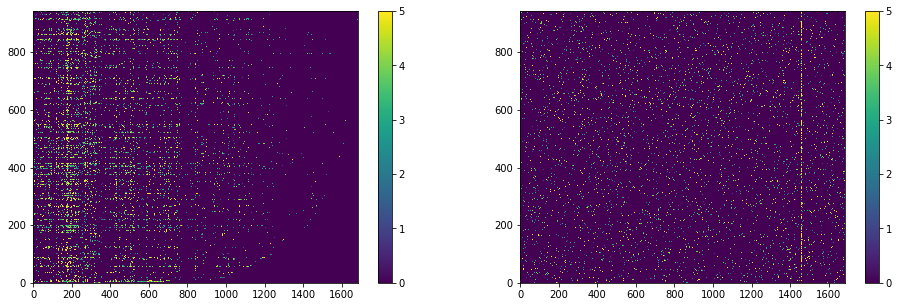

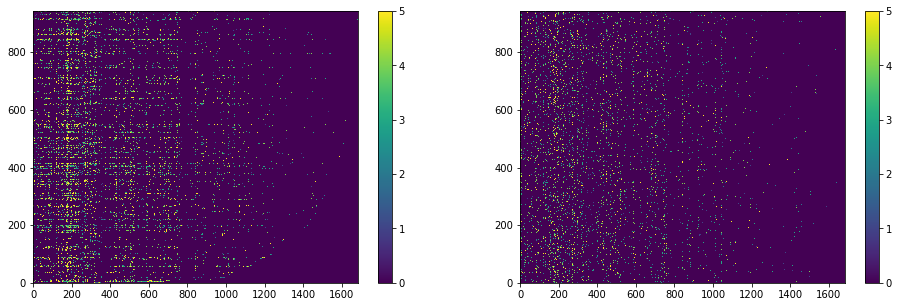

In [311]:
# round 2 and round 4
P = np.loadtxt('pop_round2.csv', delimiter=',')
fig, ax = plt.subplots(1,2,figsize=(16,5))
im = ax[1].pcolormesh(P)
fig.colorbar(im, ax=ax[1])

im2 = ax[0].pcolormesh(X)
fig.colorbar(im2, ax=ax[0])
plt.show()

P = np.loadtxt('pop_round4.csv', delimiter=',')
fig, ax = plt.subplots(1,2,figsize=(16,5))
im = ax[1].pcolormesh(P)
fig.colorbar(im, ax=ax[1])

im2 = ax[0].pcolormesh(X)
fig.colorbar(im2, ax=ax[0])
plt.show()

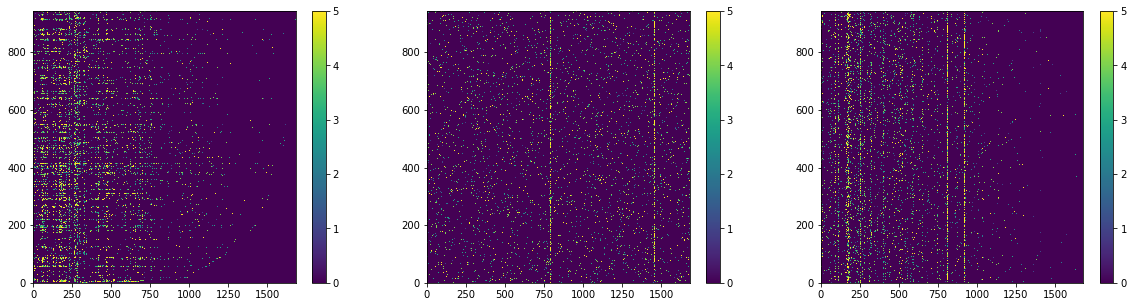

In [12]:
# round 2 and round 4

fig, ax = plt.subplots(1,3,figsize=(20,5))
P = np.loadtxt('pop_round2.csv', delimiter=',')
im = ax[1].pcolormesh(P)
fig.colorbar(im, ax=ax[1])

P = np.loadtxt('pop_round4.csv', delimiter=',')
im = ax[2].pcolormesh(P)
fig.colorbar(im, ax=ax[2])

im2 = ax[0].pcolormesh(X)
fig.colorbar(im2, ax=ax[0])
plt.show()

C:\Users\popul\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


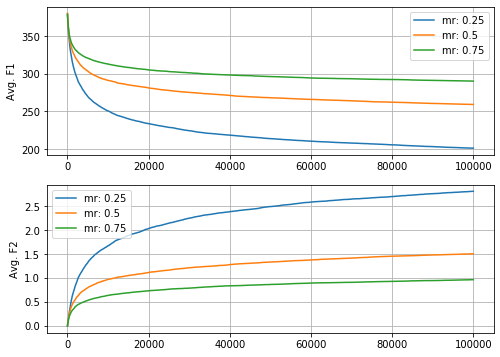

In [316]:
fig, ax = plt.subplots(2,1,figsize=(8,6))
for r,mr in zip([6, 4, 7],[0.25, 0.5, 0.75]):
    fitness_df = pd.read_csv(f'log_round{r}.csv', header=None)
    
    #ax[0].plot(fitness_df[1], label='Min F1')
    #ax[0].plot(fitness_df[2], label='Max F1')
    ax[0].plot(fitness_df[3], label=f'mr: {mr}')
    
    #ax[1].plot(fitness_df[4], label='Min F2')
    #ax[1].plot(fitness_df[5], label='Max F2')
    ax[1].plot(fitness_df[6], label=f'mr: {mr}')

ax[0].legend()
ax[0].grid()
ax[0].set_ylabel('Avg. F1')
ax[1].legend()
ax[1].grid()
ax[1].set_ylabel('Avg. F2')
plt.show()

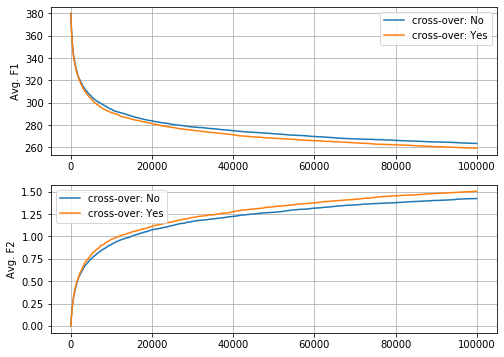

In [317]:
fig, ax = plt.subplots(2,1,figsize=(8,6))
for r,mr in zip([5, 4,],['No', 'Yes']):
    fitness_df = pd.read_csv(f'log_round{r}.csv', header=None)
    
    #ax[0].plot(fitness_df[1], label='Min F1')
    #ax[0].plot(fitness_df[2], label='Max F1')
    ax[0].plot(fitness_df[3], label=f'cross-over: {mr}')
    
    #ax[1].plot(fitness_df[4], label='Min F2')
    #ax[1].plot(fitness_df[5], label='Max F2')
    ax[1].plot(fitness_df[6], label=f'cross-over: {mr}')

ax[0].legend()
ax[0].grid()
ax[0].set_ylabel('Avg. F1')
ax[1].legend()
ax[1].grid()
ax[1].set_ylabel('Avg. F2')
plt.show()